In [9]:
import logging
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import joblib
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

root_dir = Path().resolve().parent.parent

print(root_dir)

/Users/luiskremer/Code/Uni/Code_Master_RSIV/019_scanline_segmentation


In [14]:
header_dict = {
"height_mean": "%1.4f",
"height_var": "%1.4f",
"height_std": "%1.4f",
"height_median": "%1.4f",
"height_min": "%1.4f",
"height_max": "%1.4f",
"reflectance_mean": "%1.4f",
"reflectance_var": "%1.4f",
"reflectance_std": "%1.4f",
"reflectance_median": "%1.4f",
"reflectance_min": "%1.4f",
"reflectance_max": "%1.4f",
"red_mean": "%u",
"red_var": "%u",
"red_std": "%u",
"red_median": "%u",
"red_min": "%u",
"red_max": "%u",
"green_mean": "%u",
"green_var": "%u",
"green_std": "%u",
"green_median": "%u",
"green_min": "%u",
"green_max": "%u",
"blue_mean": "%u",
"blue_var": "%u",
"blue_std": "%u",
"blue_median": "%u",
"blue_min": "%u",
"blue_max": "%u",
"rho_mean": "%1.4f",
"rho_var": "%1.4f",
"rho_std": "%1.4f",
"rho_median": "%1.4f",
"rho_min": "%1.4f",
"rho_max": "%1.4f",
"slope_mean": "%1.4f",
"slope_var": "%1.4f",
"slope_std": "%1.4f",
"slope_median": "%1.4f",
"slope_min": "%1.4f",
"slope_max": "%1.4f",
"curvature_mean": "%1.4f",
"curvature_var": "%1.4f",
"curvature_std": "%1.4f",
"curvature_median": "%1.4f",
"curvature_min": "%1.4f",
"curvature_max": "%1.4f",
"roughness_mean": "%1.6f",
"roughness_var": "%1.6f",
"roughness_std": "%1.6f",
"roughness_median": "%1.6f",
"roughness_min": "%1.6f",
"roughness_max": "%1.6f",
"nx_xyz_mean": "%1.4f",
"nx_xyz_var": "%1.4f",
"nx_xyz_std": "%1.4f",
"nx_xyz_median": "%1.4f",
"nx_xyz_min": "%1.4f",
"nx_xyz_max": "%1.4f",
"nx_xyz_ptp": "%1.4f",
"ny_xyz_mean": "%1.4f",
"ny_xyz_var": "%1.4f",
"ny_xyz_std": "%1.4f",
"ny_xyz_median": "%1.4f",
"ny_xyz_min": "%1.4f",
"ny_xyz_max": "%1.4f",
"ny_xyz_ptp": "%1.4f",
"nz_xyz_mean": "%1.4f",
"nz_xyz_var": "%1.4f",
"nz_xyz_std": "%1.4f",
"nz_xyz_median": "%1.4f",
"nz_xyz_min": "%1.4f",
"nz_xyz_max": "%1.4f",
"nz_xyz_ptp": "%1.4f",
"nx_mean": "%1.4f",
"nx_var": "%1.4f",
"nx_std": "%1.4f",
"nx_median": "%1.4f",
"nx_min": "%1.4f",
"nx_max": "%1.4f",
"nx_ptp": "%1.4f",
"ny_mean": "%1.4f",
"ny_var": "%1.4f",
"ny_std": "%1.4f",
"ny_median": "%1.4f",
"ny_min": "%1.4f",
"ny_max": "%1.4f",
"ny_ptp": "%1.4f",
"nz_mean": "%1.4f",
"nz_var": "%1.4f",
"nz_std": "%1.4f",
"nz_median": "%1.4f",
"nz_min": "%1.4f",
"nz_max": "%1.4f",
"nz_ptp": "%1.4f"}

In [7]:
rf = joblib.load(Path(root_dir) / "data/models/random_forest_SiteA.joblib")
feature_importance = rf.feature_importances_

In [11]:
feature_importance

array([0.05942819, 0.00102855, 0.00150087, 0.05983507, 0.06378835,
       0.0509382 , 0.02828158, 0.00165821, 0.00192099, 0.0282249 ,
       0.013217  , 0.01453217, 0.01074954, 0.00094295, 0.00081095,
       0.01435027, 0.00476405, 0.00615722, 0.01067104, 0.00095987,
       0.00085222, 0.01092896, 0.00610753, 0.00416494, 0.01462231,
       0.00076121, 0.00068775, 0.00935259, 0.00350798, 0.00451504,
       0.03022958, 0.00135933, 0.00133129, 0.03785384, 0.04314969,
       0.02862073, 0.00280632, 0.00084761, 0.00092601, 0.00331941,
       0.0023667 , 0.00217041, 0.00199584, 0.00077908, 0.00077517,
       0.00225914, 0.00170874, 0.00145033, 0.00394283, 0.00069139,
       0.00140514, 0.01361198, 0.00280008, 0.00411832, 0.01050215,
       0.00020217, 0.00087629, 0.01095464, 0.01046243, 0.01036464,
       0.00100047, 0.008672  , 0.00019982, 0.00086146, 0.00865121,
       0.0083066 , 0.00880247, 0.00101614, 0.05459537, 0.00040025,
       0.00091559, 0.05735081, 0.04684013, 0.05175799, 0.00100

In [15]:
features = np.array(list(header_dict.keys()))

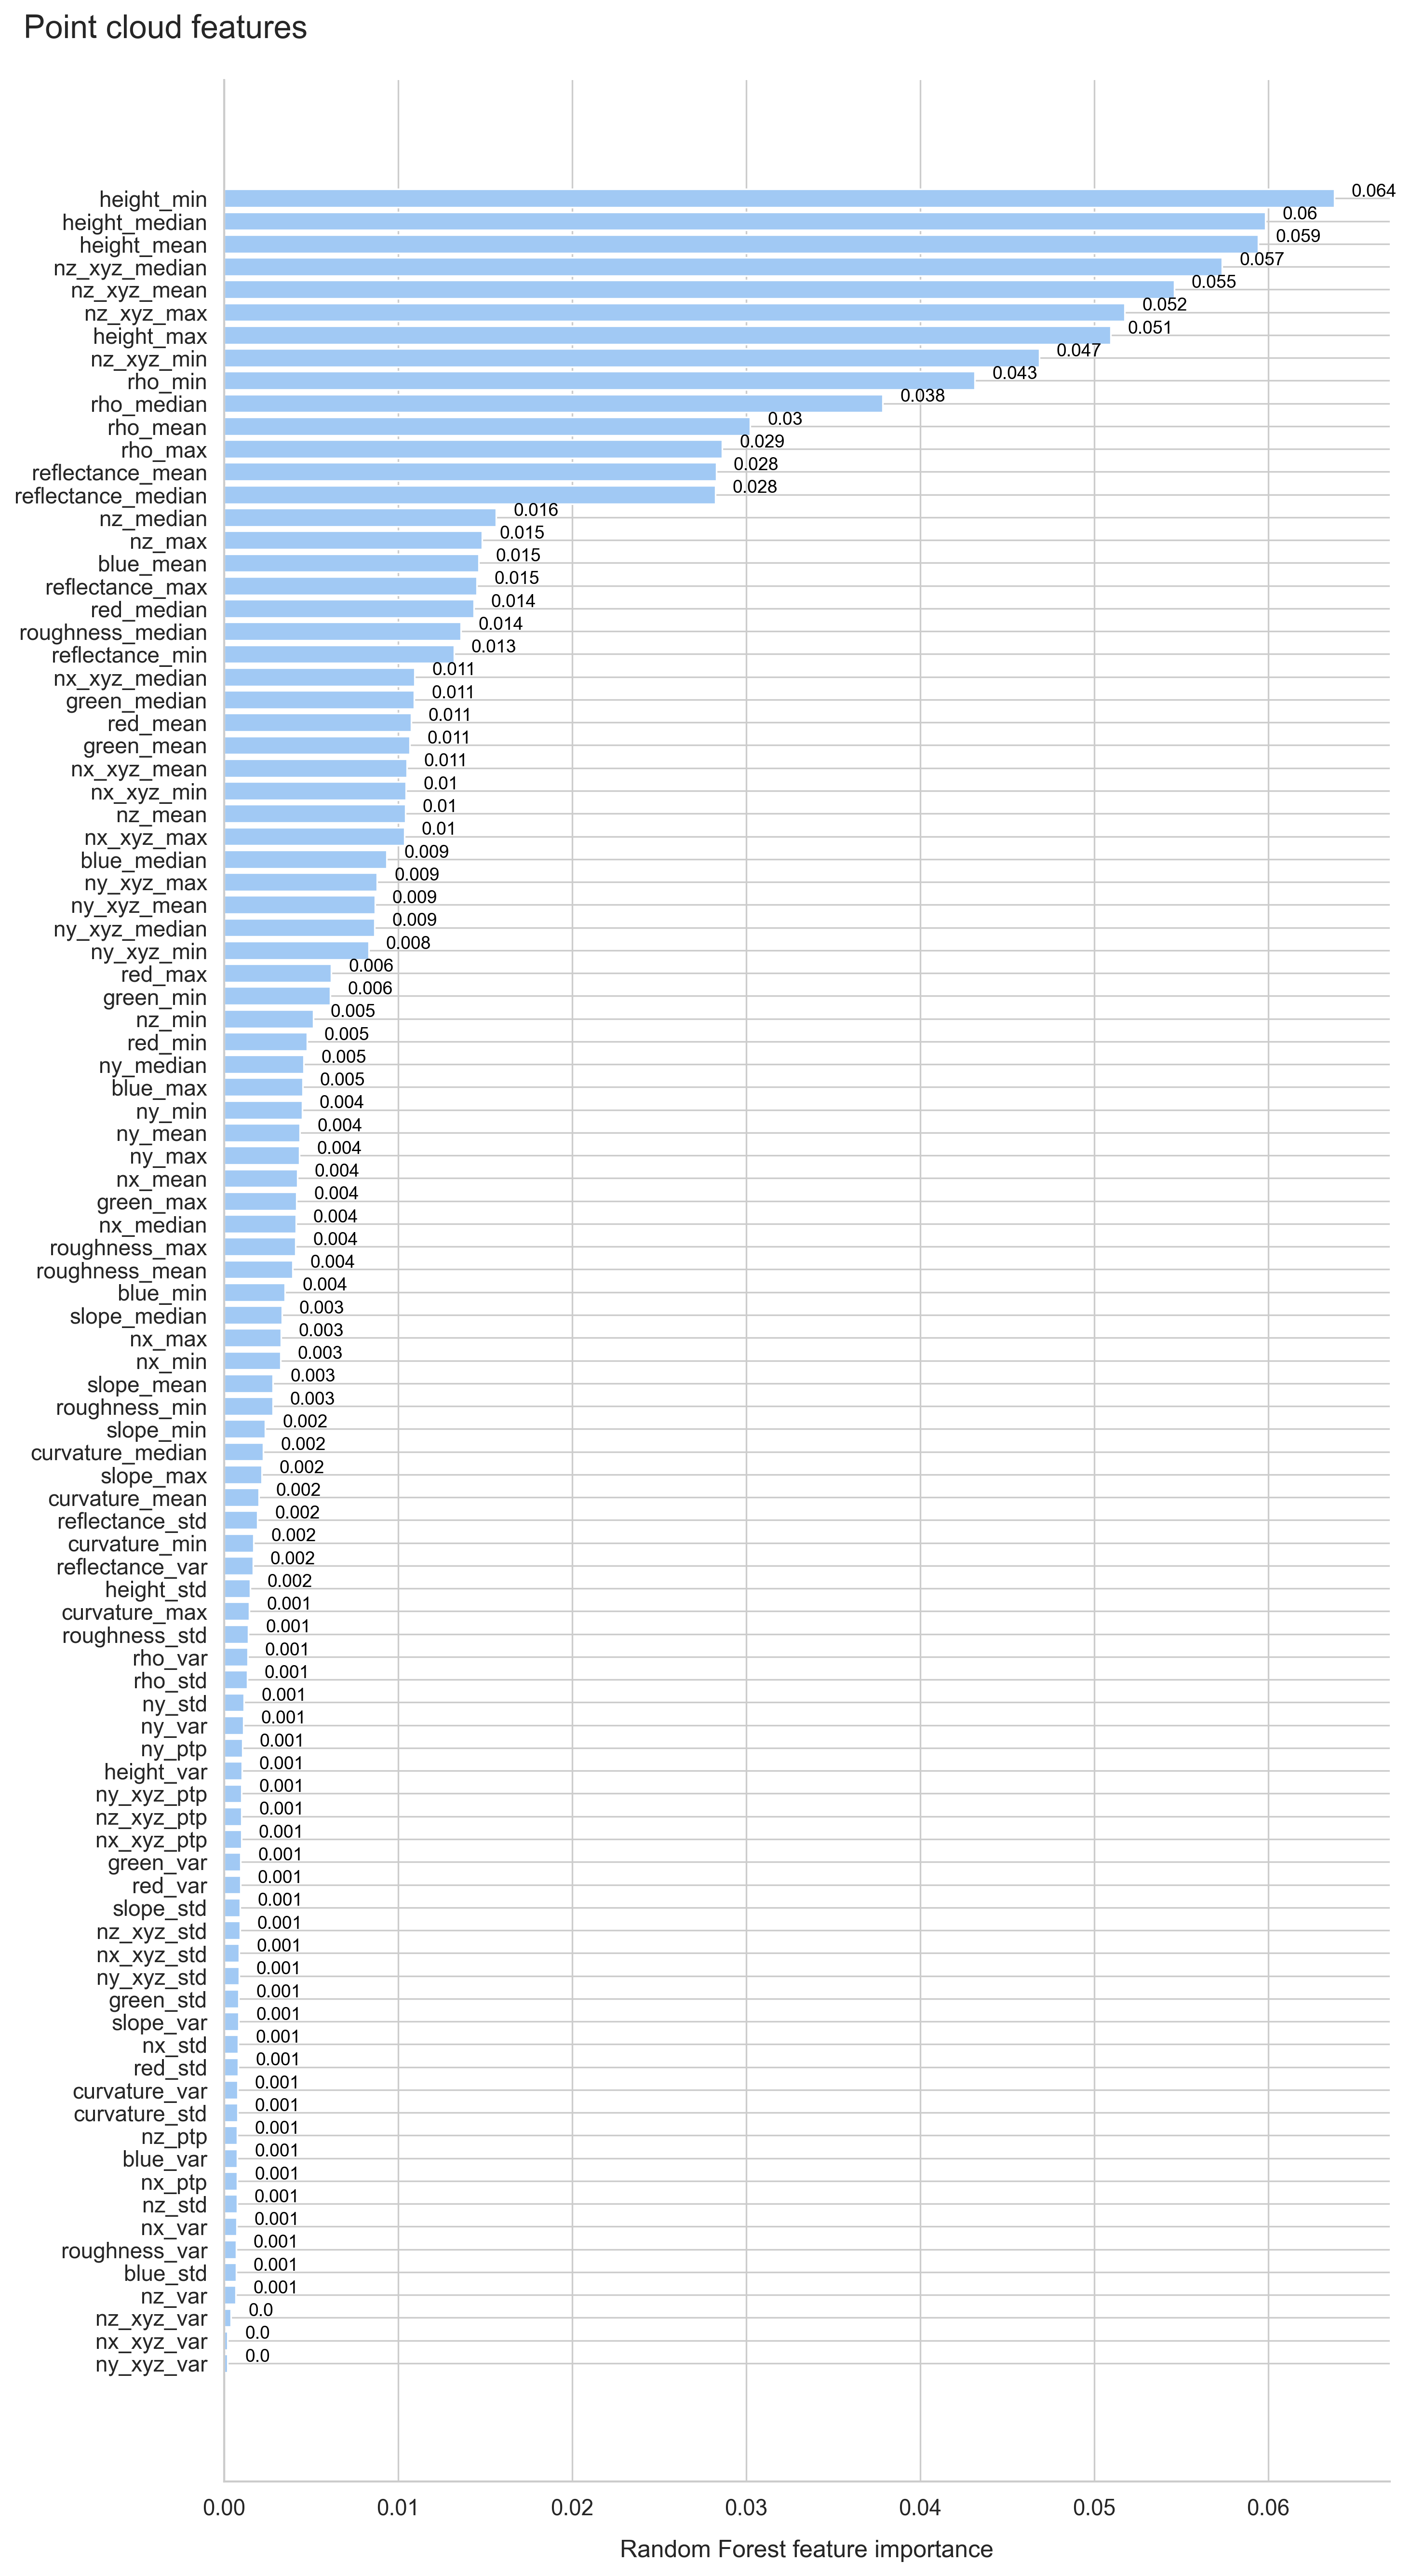

In [21]:
# Set the style, context, and palette of the plot
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette(sns.color_palette("pastel",10))

fig, ax = plt.subplots(figsize=(10, 18), dpi=300)

# Remove the upper and right spines of the plot
sns.despine()

feat_imp = rf.feature_importances_
sorted_idx = feat_imp.argsort()
ax.barh(features[sorted_idx], feat_imp[sorted_idx])

# Adjust the size of the x-ticks and y-ticks
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

# Adjust the size of the x-axis and y-axis labels
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)

ax.set_xlabel("Random Forest feature importance", fontsize=12, labelpad=10)
plt.title(" ", fontsize=16, loc='left', pad=10)
plt.text(-0.05, 1.015, 'Point cloud features', transform=ax.transAxes, ha='center', va='bottom', fontsize=16)

# Add values on top of the bars
for i, v in enumerate(feat_imp[sorted_idx]):
    ax.text(v+0.001, i + 0.085, str(round(v, 3)), color='black', fontsize=9)

# Adjust the plot layout
plt.tight_layout()

# Save the plot
#plt.savefig(os.path.join(root, 'data', 'presentation', 'plots', 'results', '09_rf_feature_importance.png'), dpi=400, bbox_inches='tight')

plt.show()